In [1]:
import json
import requests
from pprint import pprint
import pandas as pd

In [33]:
Income_df=pd.read_csv('Median Income.csv')



In [15]:
url = "https://api.usa.gov/crime/fbi/sapi/api/nibrs/homicide/offense/states/"
api_key="JWNFNOUahji0RfLcPp5tibijU737BDnY4kKfYU9i"
states=['CT', 'AL', 'MT', "MA", "DE", "MI", "MS", "ID", "AZ", "LA"]
homicide_count_2019=[]
# Build query URL
for state in states: 
    query_url = url + state + "/count?API_KEY=" + api_key
    response=requests.get(query_url).json()
    Murder_2019=response["data"][21]["value"]
    
    homicide_count_2019.append(Murder_2019)
print(homicide_count_2019)

[74, 2, 19, 78, 21, 552, 54, 26, 14, 43]


In [36]:
states_df = pd.DataFrame({
    "State (Abbreviation)": states,
    "2019 Homicides (per FBI)": homicide_count_2019
})

states_df["State"]=["Connecticut", "Alabama", "Montana", "Massachusetts","Delaware", "Michigan","Mississippi", "Idaho", "Arizona", "Louisiana" ]

states_df[["State", "State (Abbreviation)", "2019 Homicides (per FBI)"]]

,State,State (Abbreviation),2019 Homicides (per FBI)
0,Connecticut,CT,74
1,Alabama,AL,2
2,Montana,MT,19
3,Massachusetts,MA,78
4,Delaware,DE,21
5,Michigan,MI,552
6,Mississippi,MS,54
7,Idaho,ID,26
8,Arizona,AZ,14
9,Louisiana,LA,43


{'category': None,
 'data': [{'data_year': 2003,
           'key': 'Incident Count',
           'month_num': 0,
           'value': 16},
          {'data_year': 2004,
           'key': 'Incident Count',
           'month_num': 0,
           'value': 20},
          {'data_year': 2005,
           'key': 'Incident Count',
           'month_num': 0,
           'value': 16},
          {'data_year': 2006,
           'key': 'Incident Count',
           'month_num': 0,
           'value': 30},
          {'data_year': 2007,
           'key': 'Incident Count',
           'month_num': 0,
           'value': 40},
          {'data_year': 2008,
           'key': 'Incident Count',
           'month_num': 0,
           'value': 29},
          {'data_year': 2009,
           'key': 'Incident Count',
           'month_num': 0,
           'value': 27},
          {'data_year': 2010,
           'key': 'Incident Count',
           'month_num': 0,
           'value': 27},
          {'data_year': 2011,
       

<AxesSubplot:xlabel='State (Abbreviation)'>

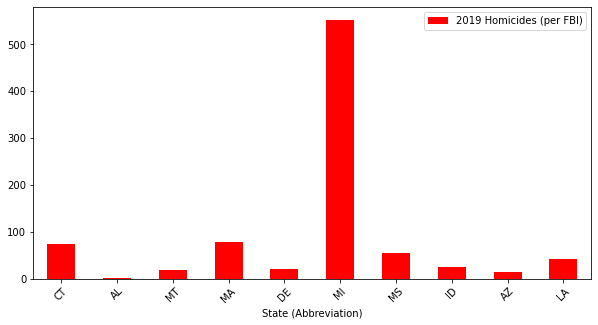

In [37]:
states_df.plot('State (Abbreviation)', '2019 Homicides (per FBI)', kind='bar', figsize=(10,5), rot=45, color="r")

In [39]:
merge_df = pd.merge(states_df, Income_df, on="State", how="left")

merge_df

,State (Abbreviation),2019 Homicides (per FBI),State,Median Income (2019)
0,CT,74,Connecticut,"87,291"
1,AL,2,Alabama,"56,200"
2,MT,19,Montana,"60,195"
3,MA,78,Massachusetts,"87,707"
4,DE,21,Delaware,"74,194"
5,MI,552,Michigan,"64,119"
6,MS,54,Mississippi,"44,787"
7,ID,26,Idaho,"65,988"
8,AZ,14,Arizona,"70,674"
9,LA,43,Louisiana,"51,707"
